$$ \Huge \text {K-nearest neighbor} $$
$$ \text { Binh Tran} $$

# Problem

With input $X$ find $K$ examples in training set that nearest to $X$


**KNN** falls in the **supervised learning** family of algorithms.

The **KNN** classifier is also a **non parametric** and **instance-based learning** algorithm.

# How does KNN work?

A popular choice is the **Euclidean distance** given by

$$d(x, x') = \sqrt{\left(x_1 - x'_1 \right)^2 + \left(x_2 - x'_2 \right)^2 + \dotsc + \left(x_n - x'_n \right)^2}$$

but other measures can be more suitable for a given setting and include the **[Manhattan](https://vi.wikipedia.org/wiki/Kho%E1%BA%A3ng_c%C3%A1ch_Manhattan), [Chebyshev](https://people.revoledu.com/kardi/tutorial/Similarity/ChebyshevDistance.html) and [Hamming](https://people.revoledu.com/kardi/tutorial/Similarity/HammingDistance.html) ** distance.   

More formally, given a positive integer K, an unseen observation $x$ and a similarity metric $d$, **KNN** performs the following **two steps**:

It runs **through the whole dataset computing d between x and each training observation**. We’ll call the **K points in the training data that are closest to x** the set. 


# pseudo code

* Input data $ a = [a_1, a_2, ..., a_D] $

* Lables $ y = [y_1, y_2, ..., y_D] $

* Training set $\mathbf{X}$
\begin{eqnarray}
X = 
\begin{bmatrix}
   x_{1,1} & x_{1,2} & \cdots & x_{1,D} \\
   x_{2,1} & x_{2,2} & \cdots & x_{2,D} \\
   \vdots  &  \vdots & \ddots  & \vdots \\
   x_{N,1} & x_{N,2} & \cdots & x_{N,D}
   \end{bmatrix}
\end{eqnarray}

* $\mathbf{S=A-X}$
\begin{eqnarray}
 = 
\begin{bmatrix}
  a_1 - x_{1,1} & a_2 - x_{1,2} & \cdots & a_D - x_{1,D} \\
  a_1 - x_{2,1} & a_2 - x_{2,2} & \cdots & a_D - x_{2,D} \\
   \vdots  &  \vdots & \ddots  & \vdots \\
  a_1 - x_{N,1} & a_2 - x_{N,2} & \cdots & a_D - x_{N,D}
   \end{bmatrix}
\end{eqnarray}

* $(\mathbf{A}-\mathbf{X})^2$
\begin{eqnarray}
 = 
\begin{bmatrix}
  (a_1 - x_{1,1})^2 & (a_2 - x_{1,2})^2 & \cdots & (a_D - x_{1,D})^2 \\
  (a_1 - x_{2,1})^2 & (a_2 - x_{2,2})^2 & \cdots & (a_D - x_{2,D})^2 \\
   \vdots  &  \vdots & \ddots  & \vdots \\
  (a_1 - x_{N,1})^2 & (a_2 - x_{N,2})^2 & \cdots & (a_D - x_{N,D})^2
   \end{bmatrix}
\end{eqnarray}

* **Sum on axis 1**

\begin{eqnarray}
 = 
\begin{bmatrix}
  (a_1 - x_{1,1})^2 + (a_2 - x_{1,2})^2 + \cdots + (a_D - x_{1,D})^2 \\
  (a_1 - x_{2,1})^2 + (a_2 - x_{2,2})^2 + \cdots + (a_D - x_{2,D})^2 \\
   \vdots  \\
  (a_1 - x_{N,1})^2 + (a_2 - x_{N,2})^2 + \cdots + (a_D - x_{N,D})^2
   \end{bmatrix}
\end{eqnarray}

* **Calculate SQRT**

\begin{eqnarray}
 = 
\begin{bmatrix}
  \sqrt{(a_1 - x_{1,1})^2 + (a_2 - x_{1,2})^2 + \cdots + (a_D - x_{1,D})^2 }\\
  \sqrt{(a_1 - x_{2,1})^2 + (a_2 - x_{2,2})^2 + \cdots + (a_D - x_{2,D})^2 }\\
   \vdots  \\
  \sqrt{(a_1 - x_{N,1})^2 + (a_2 - x_{N,2})^2 + \cdots + (a_D - x_{N,D})^2}
   \end{bmatrix}
\end{eqnarray}

* **Sort List**

* **get top K**

## Import some data to play with

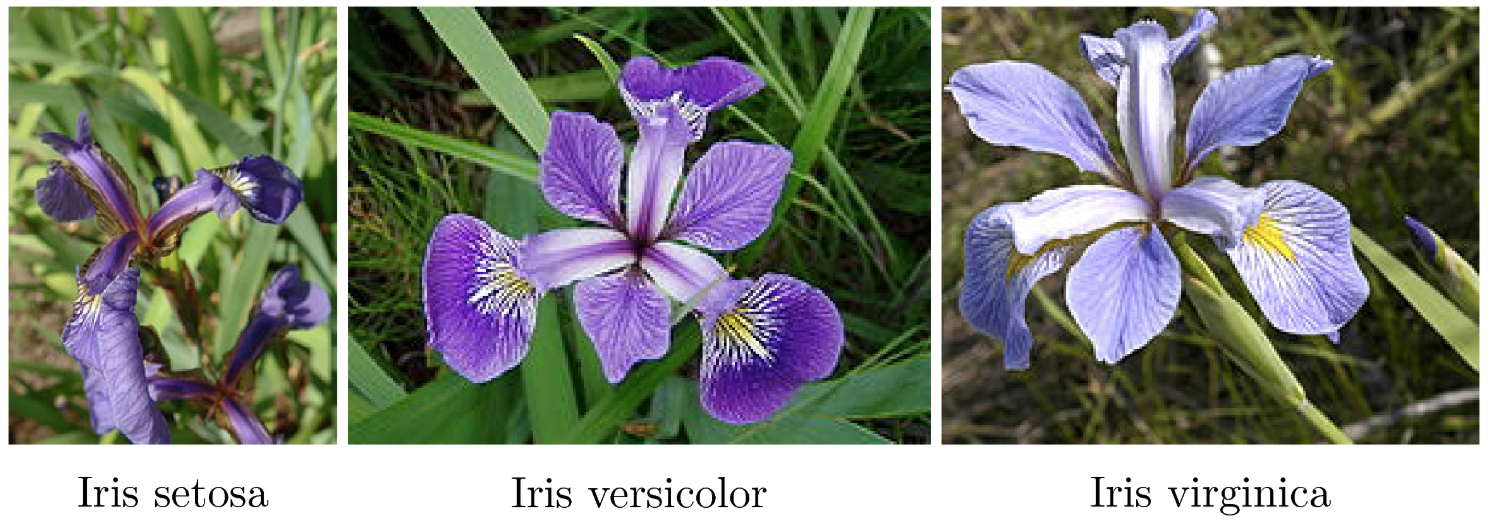

In [1]:
# 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
import pandas as pd

In [2]:
iris = datasets.load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [11]:
# print(iris.target_names[iris.target])
# print(iris.target)
data = iris.data
target = np.asarray(iris.target).reshape(data.shape[0],1)
target_name = iris.target_names[target]
print(iris.target_names)
all_data = np.concatenate((data,target, target_name) , axis=1)
display(pd.DataFrame(all_data, columns=['w','h','w','h','l','i'])[:5])

['setosa' 'versicolor' 'virginica']


w    h    w    h  l       i
0  5.1  3.5  1.4  0.2  0  setosa
1  4.9  3.0  1.4  0.2  0  setosa
2  4.7  3.2  1.3  0.2  0  setosa
3  4.6  3.1  1.5  0.2  0  setosa
4  5.0  3.6  1.4  0.2  0  setosa